# L3.1 - Image registration: transformations and cost functions

In this lab, you will start working on basic image registration by going through the concepts of transformations and cost functions that you have seen at the first lecture on medical image registration.

First of all, you should import the following useful modules:

In [27]:
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from scipy.stats import entropy
from scipy.interpolate import griddata
import numpy as np
from math import pi

You can now read the 2D image 't1_flair_pad.png' and get information about its size.

In [28]:
# TODO: read image
img = ndi.imread('t1_flair_pad.png', flatten=True)

# TODO: get image size
n_rows, n_cols = img.shape
print("Image size: number of rows = {}, number of columns = {}".format(n_rows,n_cols))

Image size: number of rows = 420, number of columns = 360


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


## 2D Transformations

You can now start getting familiar with two simple 2D transformations: translation and rotation. 

First of all, you can read the image 't1_flair_trans.png' (moving image), which is a translated version of 't1_flair_pad.png' (reference image). You should now try to manually perform registration between the two images by translating the moving one until it matches the reference one. To check if you are doing it right, it is helpful to plot not only the two images, but also the difference between them. __How should the image of the difference look like when we get a perfect alignment? How did you translate the moving image to register it to the reference one?__

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.


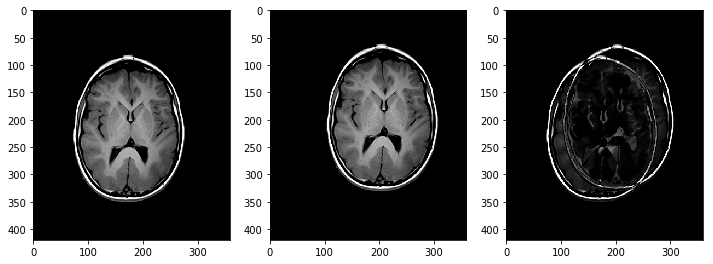

In [29]:
## Translation

# TODO: read translated image
img_trans = ndi.imread('t1_flair_trans.png', flatten=True)

# TODO: get the difference between the reference and the moving image
img_diff = (img-img_trans)**2

# plot images
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img_trans,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img_diff,cmap='gray')
plt.show()


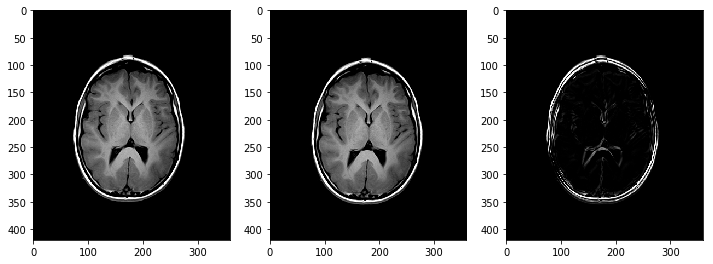

In [30]:
# TODO: adjust the position to manually get a nice alignment (it doesn't have to be perfect!)
img_adj_trans = ndi.shift(img_trans,[25,-28])

# TODO: get the new difference
img_diff = (img-img_adj_trans)**2

# TODO: plot the three images again to check the alignment
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img_adj_trans,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img_diff,cmap='gray')
plt.show()

Now you will have to do the same thing, but with a 2D rotation instead. Start by reading the rotated version of the reference image ('t1_flair_rot.png') and then try to rotate it until you get a good registration. __How much did you have to rotate the moving image to register it to the reference one?__

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.


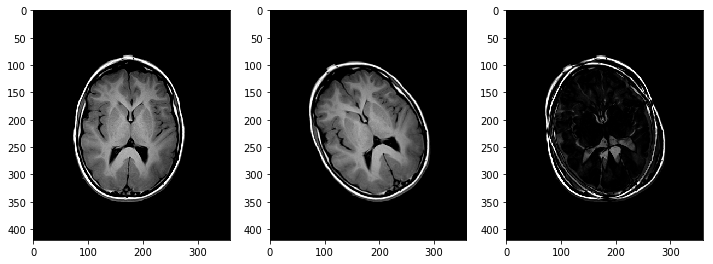

In [31]:
## Rotation

# TODO: read rotated image
img_rot = ndi.imread('t1_flair_rot.png')

# TODO: get the difference between the reference and the moving image
img_diff = (img-img_rot)**2

# plot images
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.subplot(132)
plt.imshow(img_rot, cmap='gray')
plt.subplot(133)
plt.imshow(img_diff,cmap='gray')
plt.show()



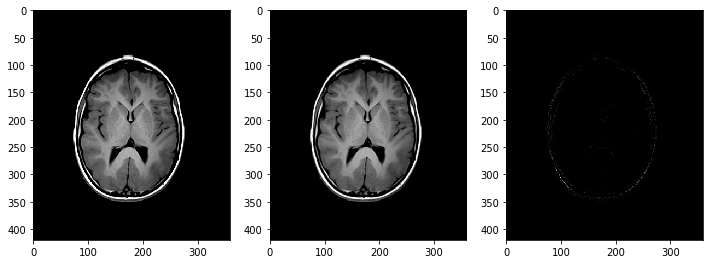

In [32]:
# TODO: adjust the position to manually get a nice alignment (it doesn't have to be perfect!)
img_adj_rot = ndi.rotate(img_rot, -30, reshape=False)

# TODO: get the new difference
img_diff = (img-img_adj_rot)**2

# plot images
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.imshow(img,cmap='gray')
plt.subplot(132)
plt.imshow(img_adj_rot,cmap='gray')
plt.subplot(133)
plt.imshow(img_diff,cmap='gray')
plt.show()

At this point, you can define a function _affinetransf_ which receives the following parameters as input:

* _img_: the image to be transformed
* _sx_: scaling along the _x_ direction
* _sy_: scaling along the _y_ direction
* _rot_: the rotation angle
* _shear_: the shearing along the _x_ direction (we won't perform shearing along the _y_ direction too in this exercise)
* _tx_: translation along the _x_ direction
* _ty_: translation along the _y_ direction

Find the appropriate affine transformation to be applied on the _x_ and _y_ coordinates in order to 1) scale the image; 2) rotate it; 3) shear it; 4) translate it.<br>
Remember to provide also some default values for the input parameters such that no transformation is applied to the image if the user does not specify any input parameter.

In [33]:
def affinetransf(img, sx=1, sy=1, rot=0, shear=0, tx=0, ty=0):

    transf_coord=[]
    transf_img_values=[]
    
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):           
            
            # TODO: apply appropriate transformation
            x_t = int(round(x*sx*np.cos(rot)+y*(shear*sx*np.cos(rot)-sx*np.sin(rot)))+tx)
            y_t = int(round(x*sy*np.sin(rot)+y*(shear*sy*np.sin(rot)+sy*np.cos(rot)))+ty)          
            
            transf_coord.append([y_t, x_t])
            transf_img_values.append(img[y, x])
            
            
    
    # multidimensional grid used for defining the points at which interpolating the transformed data.
    # in this case the output image will have the same size as the input image (but you are free to test other sizes).
    grid_y, grid_x = np.mgrid[0:img.shape[0], 0:img.shape[1]]
    
    
    # TODO: see documentation of scipy.interpolate.griddata to perform the interpolation using the variables above
    transf_img = griddata(transf_coord,transf_img_values,(grid_y,grid_x),method='linear',fill_value=0)
    
    return transf_img

Once your function is ready, you can use it to transform 't1_flair_pad.png' by testing different values. You can plot both the original and transformed image to check whether your function is performing what you expect (notice that here the origin is defined in the top-left corner and not in the center of the image, so this fact can explain some "unexpected" results!).

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


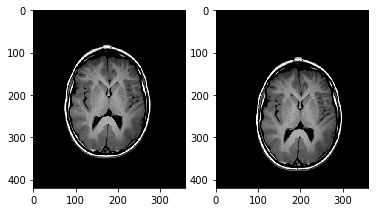

In [34]:
# TODO: choose the parameters
sx = 1
sy = 1
rot = 0
shear = 0
tx = 20
ty = 30

# TODO: transformation
transf_img = affinetransf(img,sx,sy,rot,shear,tx,ty)
print(transf_img)
# plot both images
plt.figure()
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(transf_img, cmap='gray')
plt.show()


## Cost functions

Now you can define three functions, each one implementing one cost function: normalized sum of squared differences, normalized cross correlation and normalized mutual information.<br>
Each function should receive, as input, two images (_img1_ and _img2_), which are the reference and the moving image. The output of the cost functions is an error value _dist_ that indicates how different the two images are between each other. The lower the output of the cost function, the better the alignment between the two images.

In [35]:
# sum of squared differences
def ssd(img1, img2):    
    # TODO: compute the sum of squared differences (the sum is here used instead of the integral seen in the lecture slides)
    dist = np.sum((img1-img2) ** 2)            
    # normalization
    dist /= float(img1.shape[0] * img1.shape[1])            
    return dist
            
# normalized cross correlation
def ncc(img1, img2):
    # TODO: subtract the mean of img1 from img1
    img1 = img1 - np.mean(np.ndarray.flatten(img1))
    # TODO: subtract the mean of img2 from img2
    img2 = img2 - np.mean(np.ndarray.flatten(img2))
    # TODO: numerator. Compute the sum (again: instead of the integral) of the products between the pixels of img1 and img2
    num = np.sum(img1*img2)
    # TODO: denominator. Check the formula in your lecture slides and use again the sum instead of integrating.
    # Keep the offset that you see below (1e-9) so that you will never run into problems when the denominator is equal to 0.
    den = 1e-9 + np.sqrt(np.sum(img1**2) * np.sum(img2**2))
    # TODO: complete the distance function
    dist = 1 - ((num/ den) ** 2)
    return dist

# mutual information
def mi(img1, img2, nbins=100):
    # the Parzen window method is used
    hist, bin_edges = np.histogramdd([np.ravel(img1), np.ravel(img2)], bins=nbins)
    # TODO: normalize the histogram
    hist /= np.sum(hist)
    # TODO: compute the entropy of img1 and img2
    H1 = entropy(np.sum(hist,axis=0))
    H2 = entropy(np.sum(hist,axis=1))
    # compute the joint entropy
    H12 = entropy(np.ravel(hist))
    # TODO: define the distance function as the inverse of the sum of the entropy of img1 and img2
    # divided by the joint entropy
    dist = - (H1 + H2) / H12
    return dist


Apply all the three functions first by setting both _img1_ and _img2_ equal to the original image 't1_flair_pad.png'. Print the resulting _dist_ value. Were these values expected?<br>
Now, let _img1_ be the same and change _img2_ by setting it equal to (1) transf_img, (2) img_trans, (3) img_adj_trans, (4) img_rot, (5) img_adj_rot from the previous tasks. Print the outputs of each cost function and __discuss how the output changes (is it decreasing or increasing? And why?) in all these different cases.__ (Remember that you can't expect _perfect_ results because of the interpolation performed when transforming the images)

In [41]:
# TODO: get the cost functions' outputs having img2=img1=img
print("Image itself")
img1 = img
img2 = img
dist_ssd = ssd(img1,img2)
dist_ncc = ncc(img1,img2)
dist_mi = mi(img1,img2)
print("Sum of square differences = {}".format(dist_ssd))
print("Normalized cross correlation = {}".format(dist_ncc))
print("Mutual information = {}".format(dist_mi))
print()

# TODO: get the cost functions' outputs having img2=transf_img
img2 = transf_img
dist_ssd = ssd(img1,img2)
dist_ncc = ncc(img1,img2)
dist_mi = mi(img1,img2)
print("Sum of square differences = {}".format(dist_ssd))
print("Normalized cross correlation = {}".format(dist_ncc))
print("Mutual information = {}".format(dist_mi))
print()


# TODO: get the cost functions' outputs having img2=img_trans
img2 = img_trans
dist_ssd = ssd(img1,img2)
dist_ncc = ncc(img1,img2)
dist_mi = mi(img1,img2)
print("Sum of square differences = {}".format(dist_ssd))
print("Normalized cross correlation = {}".format(dist_ncc))
print("Mutual information = {}".format(dist_mi))
print()

# TODO: get the cost functions' outputs having img2=img_adj_trans
img2 = img_adj_trans
dist_ssd = ssd(img1,img2)
dist_ncc = ncc(img1,img2)
dist_mi = mi(img1,img2)
print("Sum of square differences = {}".format(dist_ssd))
print("Normalized cross correlation = {}".format(dist_ncc))
print("Mutual information = {}".format(dist_mi))
print()

# TODO: get the cost functions' outputs having img2=img_rot
img2 = img_rot
dist_ssd = ssd(img1,img2)
dist_ncc = ncc(img1,img2)
dist_mi = mi(img1,img2)
print("Sum of square differences = {}".format(dist_ssd))
print("Normalized cross correlation = {}".format(dist_ncc))
print("Mutual information = {}".format(dist_mi))
print()

# TODO: get the cost functions' outputs having img2=img_adj_rot
img2 = img_adj_rot
dist_ssd = ssd(img1,img2)
dist_ncc = ncc(img1,img2)
dist_mi = mi(img1,img2)
print("Sum of square differences = {}".format(dist_ssd))
print("Normalized cross correlation = {}".format(dist_ncc))
print("Mutual information = {}".format(dist_mi))
print()

Image itself
Sum of square differences = 0.0
Normalized cross correlation = 0.0
Mutual information = -2.0000000000000004

Sum of square differences = 2653.1960714285715
Normalized cross correlation = 0.7078241128440007
Mutual information = -1.0968148133884332

Sum of square differences = 2730.3348148148148
Normalized cross correlation = 0.7220870874462547
Mutual information = -1.0932364759359354

Sum of square differences = 1614.065185185185
Normalized cross correlation = 0.48090230952395574
Mutual information = -1.2087317743901587

Sum of square differences = 2318.8302645502645
Normalized cross correlation = 0.65009633394821
Mutual information = -1.1341076309622378

Sum of square differences = 9.071071428571429
Normalized cross correlation = 0.0028636247652209512
Mutual information = -1.617710952003232

